In [59]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [60]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [61]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [62]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [63]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

coquimbo cl
hobart au
rikitea pf
yellowknife ca
attawapiskat ca
mar del plata ar
troitsko-pechorsk ru
attawapiskat ca
saint-philippe re
esperance au
barrow us
samusu ws
dali cn
darnah ly
zaysan kz
rikitea pf
hilo us
mataura pf
rikitea pf
north bend us
rikitea pf
mahebourg mu
amahai id
hermanus za
christchurch nz
yellowknife ca
bambous virieux mu
saint george bm
rio grande br
barentsburg sj
nikolskoye ru
busselton au
great yarmouth gb
bredasdorp za
champerico gt
constitucion cl
avarua ck
rikitea pf
marawi sd
hermanus za
fortuna us
upernavik gl
ushuaia ar
rikitea pf
punta arenas cl
cape town za
luwingu zm
zhangjiakou cn
punta arenas cl
lake havasu city us
araouane ml
grand river south east mu
ushuaia ar
krasnoselkup ru
isiro cd
lorengau pg
cape town za
mataura pf
saskylakh ru
asau tv
busselton au
bredasdorp za
chokurdakh ru
batesville us
punta arenas cl
jamestown sh
mataura pf
east london za
ouango cf
sal rei cv
longyearbyen sj
jamestown sh
longyearbyen sj
beyneu kz
floro no
rikitea pf
a

mehamn no
berlevag no
sovetsk ru
avarua ck
te anau nz
georgetown sh
locri it
rikitea pf
victoria sc
sioux lookout ca
meadow lake ca
kruisfontein za
rikitea pf
besancon fr
castro cl
rikitea pf
portland au
ponta delgada pt
ushuaia ar
busselton au
longyearbyen sj
port hardy ca
nsanje mw
hobart au
porto novo cv
byron bay au
yellowknife ca
bidor my
upernavik gl
tiksi ru
auki sb
jamestown sh
rocha uy
buala sb
cortez us
roma au
saskylakh ru
arraial do cabo br
torbay ca
namibe ao
altonia br
urengoy ru
rikitea pf
hermanus za
kodiak us
mount gambier au
mercedes ar
chuy uy
ilulissat gl
isangel vu
anyang cn
bayburt tr
jamestown sh
cherskiy ru
illoqqortoormiut gl
hilo us
tiarei pf
sitka us
kijini tz
taolanaro mg
castro cl
bethel us
saint-philippe re
angoche mz
guerrero negro mx
henties bay na
taolanaro mg
qaanaaq gl
busselton au
georgetown sh
albany au
nikolskoye ru
saskylakh ru
rikitea pf
camargo bo
cabo san lucas mx
gushikawa jp
hilo us
bluff nz
punta arenas cl
new norfolk au
kapaa us
cherskiy ru

mackay au
kibuye rw
puerto ayora ec
tuktoyaktuk ca
busselton au
rikitea pf
boulder city us
ekhabi ru
nanortalik gl
georgetown sh
bluff nz
puerto ayora ec
punta arenas cl
ushuaia ar
qandala so
torbay ca
busselton au
moindou nc
hilo us
garissa ke
albany au
mataura pf
sitka us
rikitea pf
san cristobal ec
mar del plata ar
jamestown sh
saskylakh ru
chokurdakh ru
busselton au
sechura pe


In [64]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [65]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [66]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | troitsko-pechorsk
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | samusu
City not found. Skipping...
Processing Record 12 of Set 1 | dali
Processing Record 13 of Set 1 | darnah
Processing Record 14 of Set 1 | zaysan
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | amahai
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | christchurch
Processing Record 2

Processing Record 39 of Set 4 | pevek
Processing Record 40 of Set 4 | samarai
Processing Record 41 of Set 4 | jos
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | najran
Processing Record 45 of Set 4 | garh maharaja
Processing Record 46 of Set 4 | kulhudhuffushi
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | buraydah
Processing Record 49 of Set 4 | los llanos de aridane
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | rio gallegos
Processing Record 2 of Set 5 | ulaangom
Processing Record 3 of Set 5 | beruwala
Processing Record 4 of Set 5 | grindavik
Processing Record 5 of Set 5 | jining
Processing Record 6 of Set 5 | joshimath
Processing Record 7 of Set 5 | ijaki
City not found. Skipping...
Processing Record 8 of Set 5 | raudeberg
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set 5 | jalu
Processing Record 11 of Set 5 | iqa

Processing Record 28 of Set 8 | araguacu
Processing Record 29 of Set 8 | harper
Processing Record 30 of Set 8 | salinas
Processing Record 31 of Set 8 | amalapuram
Processing Record 32 of Set 8 | hualmay
Processing Record 33 of Set 8 | ciudad bolivar
Processing Record 34 of Set 8 | marietta
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | mecca
Processing Record 37 of Set 8 | sotnikovo
Processing Record 38 of Set 8 | kondinskoye
Processing Record 39 of Set 8 | alice springs
Processing Record 40 of Set 8 | segezha
Processing Record 41 of Set 8 | batemans bay
Processing Record 42 of Set 8 | azrow
City not found. Skipping...
Processing Record 43 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 8 | wanning
Processing Record 45 of Set 8 | johi
Processing Record 46 of Set 8 | camacupa
Processing Record 47 of Set 8 | kohima
Processing Record 48 of Set 8 | touros
Processing Record 49 of Set 8 | balsta
Processing Record 50 of Set 8 | vidim
Proce

Processing Record 16 of Set 12 | almeirim
Processing Record 17 of Set 12 | gizo
Processing Record 18 of Set 12 | koboko
Processing Record 19 of Set 12 | la gaulette
City not found. Skipping...
Processing Record 20 of Set 12 | merauke
Processing Record 21 of Set 12 | chico
Processing Record 22 of Set 12 | bandar-e lengeh
Processing Record 23 of Set 12 | nindiri
Processing Record 24 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 12 | azogues
Processing Record 26 of Set 12 | sur
Processing Record 27 of Set 12 | cahabon
Processing Record 28 of Set 12 | ribeira brava
Processing Record 29 of Set 12 | oranjestad
Processing Record 30 of Set 12 | kirando
Processing Record 31 of Set 12 | jawa
Processing Record 32 of Set 12 | ambulu
Processing Record 33 of Set 12 | autazes
Processing Record 34 of Set 12 | usak
Processing Record 35 of Set 12 | viedma
Processing Record 36 of Set 12 | coahuayana
Processing Record 37 of Set 12 | eldikan
City not found. Skipping...
P

In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,56.93,82,0,9.22,CL,2021-09-30 23:31:14
1,Hobart,-42.8794,147.3294,58.12,96,90,5.01,AU,2021-09-30 23:34:14
2,Rikitea,-23.1203,-134.9692,72.90,74,3,17.25,PF,2021-09-30 23:34:55
3,Yellowknife,62.4560,-114.3525,50.41,94,90,3.00,CA,2021-09-30 23:34:33
4,Mar Del Plata,-38.0023,-57.5575,58.12,48,40,5.75,AR,2021-09-30 23:34:28
5,Troitsko-Pechorsk,62.7084,56.1964,33.31,86,100,5.03,RU,2021-09-30 23:43:40
6,Saint-Philippe,-21.3585,55.7679,71.15,80,49,11.90,RE,2021-09-30 23:34:59
7,Esperance,-33.8667,121.9000,57.04,60,15,8.93,AU,2021-09-30 23:35:30
8,Barrow,71.2906,-156.7887,28.42,80,75,11.50,US,2021-09-30 23:35:36
9,Dali,25.7000,100.1833,60.46,89,25,1.30,CN,2021-09-30 23:43:42


In [68]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,2021-09-30 23:31:14,-29.9533,-71.3436,56.93,82,0,9.22
1,Hobart,AU,2021-09-30 23:34:14,-42.8794,147.3294,58.12,96,90,5.01
2,Rikitea,PF,2021-09-30 23:34:55,-23.1203,-134.9692,72.90,74,3,17.25
3,Yellowknife,CA,2021-09-30 23:34:33,62.4560,-114.3525,50.41,94,90,3.00
4,Mar Del Plata,AR,2021-09-30 23:34:28,-38.0023,-57.5575,58.12,48,40,5.75
5,Troitsko-Pechorsk,RU,2021-09-30 23:43:40,62.7084,56.1964,33.31,86,100,5.03
6,Saint-Philippe,RE,2021-09-30 23:34:59,-21.3585,55.7679,71.15,80,49,11.90
7,Esperance,AU,2021-09-30 23:35:30,-33.8667,121.9000,57.04,60,15,8.93
8,Barrow,US,2021-09-30 23:35:36,71.2906,-156.7887,28.42,80,75,11.50
9,Dali,CN,2021-09-30 23:43:42,25.7000,100.1833,60.46,89,25,1.30


In [69]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

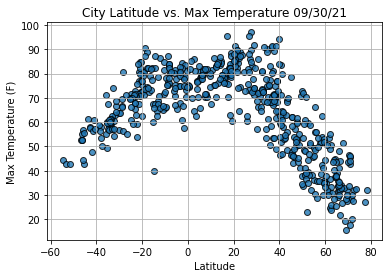

In [71]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

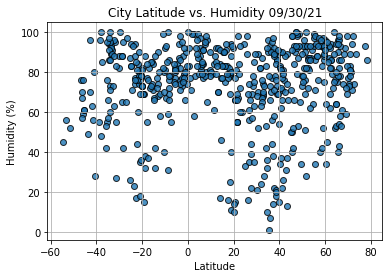

In [72]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

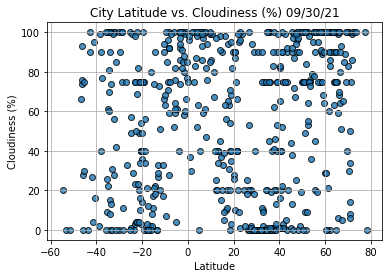

In [73]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

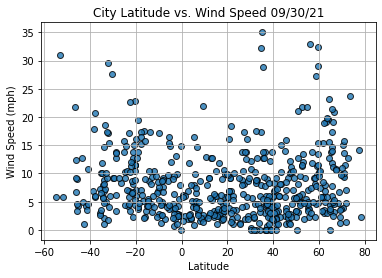

In [74]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [75]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-09-30 23:34:39
Lat                      -46.1927
Lng                      168.8643
Max Temp                    52.48
Humidity                       70
Cloudiness                     93
Wind Speed                   6.67
Name: 13, dtype: object

In [77]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
550     True
551     True
552    False
553    False
554    False
Name: Lat, Length: 555, dtype: bool

In [78]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Yellowknife,CA,2021-09-30 23:34:33,62.4560,-114.3525,50.41,94,90,3.00
5,Troitsko-Pechorsk,RU,2021-09-30 23:43:40,62.7084,56.1964,33.31,86,100,5.03
8,Barrow,US,2021-09-30 23:35:36,71.2906,-156.7887,28.42,80,75,11.50
9,Dali,CN,2021-09-30 23:43:42,25.7000,100.1833,60.46,89,25,1.30
10,Darnah,LY,2021-09-30 23:43:42,32.7670,22.6367,73.38,74,2,8.79


In [79]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

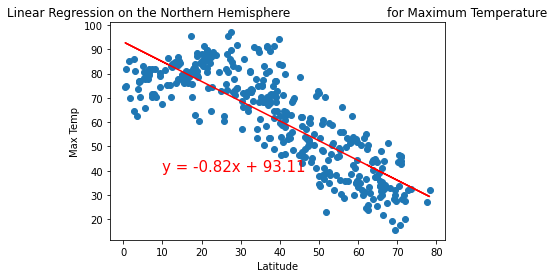

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

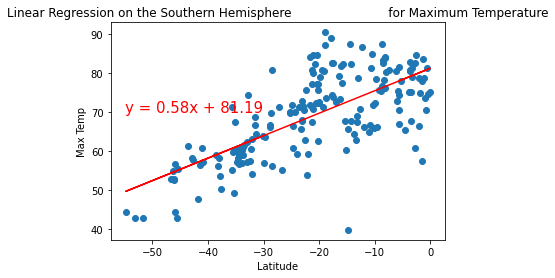

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,70))

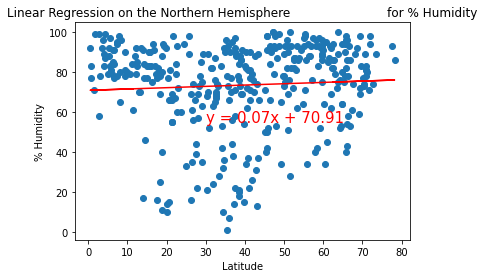

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(30,55))

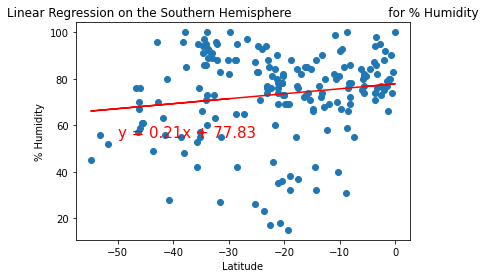

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,55))

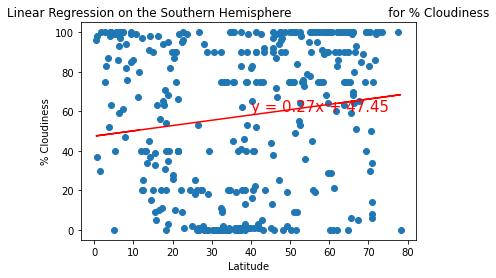

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

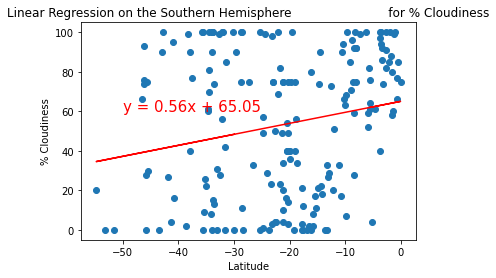

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

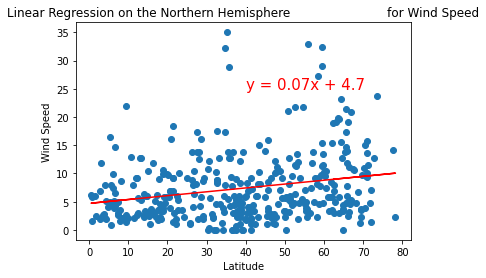

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

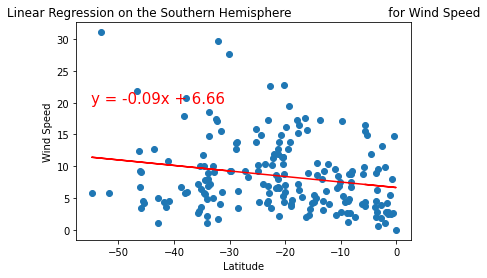

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))